### Collecting Data

In [1]:
# Import the convention
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
# URL of the target website
url = 'https://www.basketball-reference.com/teams/POR/'
# Request the target website and set response to see it's response
response = requests.get(url)
print(response)

<Response [200]>


Now we have seen that the respond is 200 which means it is successfull.
Let's parse the content using BeautifulShop

In [3]:
soup = BeautifulSoup(response.content, 'html.parser')

Since we knew by inspecting the website page that the data are under the table tag, let's extract data values from the table tag

In [4]:
table_data = soup.find_all('table')

By inspecting the website, we also see that the first table is the table we wanted to analyze

In [5]:
data = table_data[0]

Lets extract the headers and it's data and also convert it into a dataframe format

### Cleaning Data

In [6]:
headers = [th.get_text() for th in data.find_all('th')]
data_rows = data.find_all('tr')[1:]
values = []

for i in data_rows:
    get_data = [td.get_text() for td in i.find_all('td')]
    get_data.insert(0, i.find('th').get_text()) 
    filled_values = [val if val else '' for val in get_data]
    values.append(filled_values)
    
    
# Determine the maximum number of columns
max_columns = max(len(row) for row in values)

# Pad rows with fewer columns with empty strings
values = [row + [''] * (max_columns - len(row)) for row in values]

df = pd.DataFrame(values, columns=headers[:max_columns])


Now let's see how our dataframe are looking by now

In [7]:
df

,Season,Lg,Team,W,L,W/L%,Finish,SRS,,Pace,Rel Pace,ORtg,Rel ORtg,DRtg,Rel DRtg,,Playoffs,Coaches,Top WS
0,2023-24,NBA,Portland Trail Blazers,0,0,,,,,,,,,,,,,C. Billups (0-0),
1,2022-23,NBA,Portland Trail Blazers,33,49,.402,5th of 5,-3.96,,98.6,-0.5,114.8,0.0,118.8,4.0,,,C. Billups (33-49),D. Lillard (9.0)
2,2021-22,NBA,Portland Trail Blazers,27,55,.329,4th of 5,-8.55,,98.3,0.1,107.8,-4.2,116.9,4.9,,,C. Billups (27-55),J. Nurkić (3.6)
3,2020-21,NBA,Portland Trail Blazers*,42,30,.583,3rd of 5,1.81,,98.4,-0.8,117.8,5.5,116.0,3.7,,Lost W. Conf. 1st Rnd.,T. Stotts (42-30),D. Lillard (10.4)
4,2019-20,NBA,Portland Trail Blazers*,35,39,.473,4th of 5,-0.61,,100.7,0.4,113.7,3.1,114.8,4.2,,Lost W. Conf. 1st Rnd.,T. Stotts (35-39),D. Lillard (11.6)
5,2018-19,NBA,Portland Trail Blazers*,53,29,.646,2nd of 5,4.43,,99.1,-0.9,114.7,4.3,110.5,0.1,,Lost W. Conf. Finals,T. Stotts (53-29),D. Lillard (12.1)
6,2017-18,NBA,Portland Trail Blazers*,49,33,.598,1st of 5,2.60,,96.5,-0.8,109.1,0.5,106.4,-2.2,,Lost W. Conf. 1st Rnd.,T. Stotts (49-33),D. Lillard (12.6)
7,2016-17,NBA,Portland Trail Blazers*,41,41,.500,3rd of 5,-0.23,,96.7,0.3,110.3,1.5,110.8,2.0,,Lost W. Conf. 1st Rnd.,T. Stotts (41-41),D. Lillard (10.4)
8,2015-16,NBA,Portland Trail Blazers*,44,38,.537,2nd of 5,0.98,,96.0,0.2,108.8,2.4,108.0,1.6,,Lost W. Conf. Semis,T. Stotts (44-38),D. Lillard (9.2)
9,2014-15,NBA,Portland Trail Blazers*,51,31,.622,1st of 5,4.41,,94.2,0.3,108.2,2.6,103.7,-1.9,,Lost W. Conf. 1st Rnd.,T. Stotts (51-31),D. Lillard (10.6)


The next step after we collect our data is we have to perform data pre-processing so that our data can be processed nicely.

Data pre-processing we'll perform first is Feature Selection.
The variable we'll be dropping are:
1. Lg = League -> We know that we are reviewing an NBA team, so we won't use this
2. Team = Team -> This also won't matter because we are reviewing how is 2022-2023 team perform last year hence we already know the team is Portland Trailblazer

In [8]:
df = df.drop(['Lg', 'Team'],axis=1)

We also will be dropping this year's row because the Season haven't even started yet

In [9]:
df = df.drop([0])
df

,Season,W,L,W/L%,Finish,SRS,,Pace,Rel Pace,ORtg,Rel ORtg,DRtg,Rel DRtg,,Playoffs,Coaches,Top WS
1,2022-23,33,49,.402,5th of 5,-3.96,,98.6,-0.5,114.8,0.0,118.8,4.0,,,C. Billups (33-49),D. Lillard (9.0)
2,2021-22,27,55,.329,4th of 5,-8.55,,98.3,0.1,107.8,-4.2,116.9,4.9,,,C. Billups (27-55),J. Nurkić (3.6)
3,2020-21,42,30,.583,3rd of 5,1.81,,98.4,-0.8,117.8,5.5,116.0,3.7,,Lost W. Conf. 1st Rnd.,T. Stotts (42-30),D. Lillard (10.4)
4,2019-20,35,39,.473,4th of 5,-0.61,,100.7,0.4,113.7,3.1,114.8,4.2,,Lost W. Conf. 1st Rnd.,T. Stotts (35-39),D. Lillard (11.6)
5,2018-19,53,29,.646,2nd of 5,4.43,,99.1,-0.9,114.7,4.3,110.5,0.1,,Lost W. Conf. Finals,T. Stotts (53-29),D. Lillard (12.1)
6,2017-18,49,33,.598,1st of 5,2.60,,96.5,-0.8,109.1,0.5,106.4,-2.2,,Lost W. Conf. 1st Rnd.,T. Stotts (49-33),D. Lillard (12.6)
7,2016-17,41,41,.500,3rd of 5,-0.23,,96.7,0.3,110.3,1.5,110.8,2.0,,Lost W. Conf. 1st Rnd.,T. Stotts (41-41),D. Lillard (10.4)
8,2015-16,44,38,.537,2nd of 5,0.98,,96.0,0.2,108.8,2.4,108.0,1.6,,Lost W. Conf. Semis,T. Stotts (44-38),D. Lillard (9.2)
9,2014-15,51,31,.622,1st of 5,4.41,,94.2,0.3,108.2,2.6,103.7,-1.9,,Lost W. Conf. 1st Rnd.,T. Stotts (51-31),D. Lillard (10.6)
10,2013-14,54,28,.659,2nd of 5,4.44,,94.9,1.0,111.5,4.8,107.4,0.7,,Lost W. Conf. Semis,T. Stotts (54-28),D. Lillard (9.6)


In [10]:
df.describe()

,Season,W,L,W/L%,Finish,SRS,,Pace,Rel Pace,ORtg,Rel ORtg,DRtg,Rel DRtg,,Playoffs,Coaches,Top WS
count,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
unique,53,28,29,30,14,52,1,49,42,46,43,42,41,1,6,50,51
top,2022-23,49,33,.598,5th of 5,2.60,,98.6,0.3,108.8,3.2,105.7,-0.5,,Lost W. Conf. 1st Rnd.,J. Ramsay (42-40),D. Lillard (10.4)
freq,1,5,5,5,7,2,53,2,4,3,3,2,3,53,25,2,2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 1 to 53
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Season    53 non-null     object
 1   W         53 non-null     object
 2   L         53 non-null     object
 3   W/L%      53 non-null     object
 4   Finish    53 non-null     object
 5   SRS       53 non-null     object
 6             53 non-null     object
 7   Pace      53 non-null     object
 8   Rel Pace  53 non-null     object
 9   ORtg      53 non-null     object
 10  Rel ORtg  53 non-null     object
 11  DRtg      53 non-null     object
 12  Rel DRtg  53 non-null     object
 13            53 non-null     object
 14  Playoffs  53 non-null     object
 15  Coaches   53 non-null     object
 16  Top WS    53 non-null     object
dtypes: object(17)
memory usage: 7.2+ KB


In [12]:
df = df.drop(df.columns[6], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 1 to 53
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Season    53 non-null     object
 1   W         53 non-null     object
 2   L         53 non-null     object
 3   W/L%      53 non-null     object
 4   Finish    53 non-null     object
 5   SRS       53 non-null     object
 6   Pace      53 non-null     object
 7   Rel Pace  53 non-null     object
 8   ORtg      53 non-null     object
 9   Rel ORtg  53 non-null     object
 10  DRtg      53 non-null     object
 11  Rel DRtg  53 non-null     object
 12  Playoffs  53 non-null     object
 13  Coaches   53 non-null     object
 14  Top WS    53 non-null     object
dtypes: object(15)
memory usage: 6.3+ KB


In [13]:
new_df = df[['W/L%', 'SRS','Pace', 'Rel ORtg', 'Rel DRtg']].copy()
print(new_df)
# Save our pre-processed data
preprocessed_data = new_df.copy()
preprocessed_data.to_csv('half.csv', index=False)

    W/L%    SRS   Pace Rel ORtg Rel DRtg
1   .402  -3.96   98.6      0.0      4.0
2   .329  -8.55   98.3     -4.2      4.9
3   .583   1.81   98.4      5.5      3.7
4   .473  -0.61  100.7      3.1      4.2
5   .646   4.43   99.1      4.3      0.1
6   .598   2.60   96.5      0.5     -2.2
7   .500  -0.23   96.7      1.5      2.0
8   .537   0.98   96.0      2.4      1.6
9   .622   4.41   94.2      2.6     -1.9
10  .659   4.44   94.9      4.8      0.7
11  .402  -2.53   91.4     -0.1      3.3
12  .424  -0.22   91.2      1.1      1.8
13  .585   1.85   87.9      1.5     -0.2
14  .610   3.18   87.7      3.2     -0.5
15  .659   5.00   86.6      5.6     -0.5
16  .500  -0.52   87.9     -0.2      0.9
17  .390  -3.78   88.3     -1.4      3.4
18  .256  -8.91   87.6     -5.1      5.7
19  .329  -3.45   89.8     -2.9      1.6
20  .500  -0.58   86.2      0.8      2.2
21  .610   2.97   89.4      1.9     -1.0
22  .598   3.21   89.3      2.9     -0.5
23  .610   4.52   89.1      3.5     -1.2
24  .720   6.36 

### Exploring and Analyzing Data

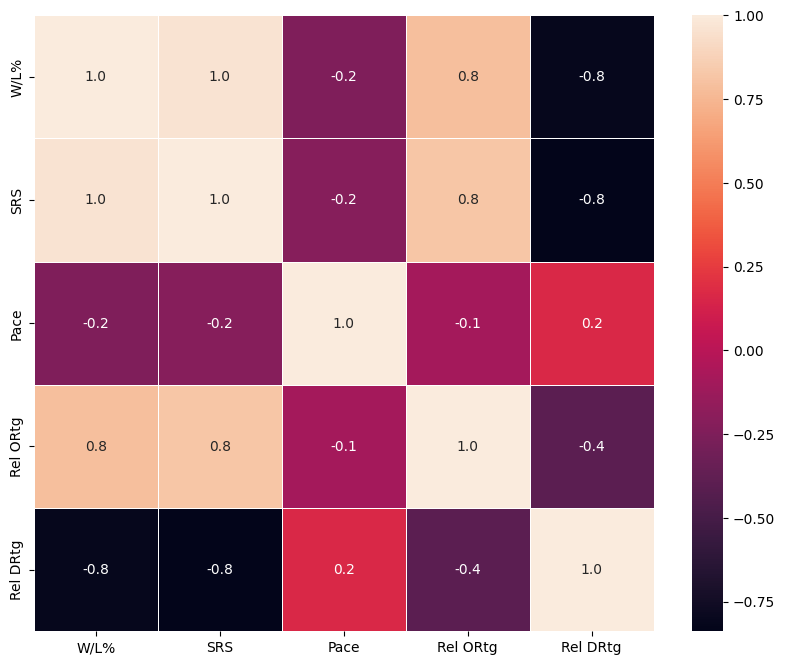

In [14]:
# Convert columns to numeric data types
new_df['W/L%'] = pd.to_numeric(new_df['W/L%'])
new_df['SRS'] = pd.to_numeric(new_df['SRS'])
new_df['Pace'] = pd.to_numeric(new_df['Pace'])
new_df['Rel ORtg'] = pd.to_numeric(new_df['Rel ORtg'])
new_df['Rel DRtg'] = pd.to_numeric(new_df['Rel DRtg'])

# Calculate correlation and drop any columns with missing values
data_corr = new_df.corr(method='pearson')
data_corr = data_corr.dropna(axis=1, how='any')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_corr, annot=True, linewidths=.5, fmt='.1f')
plt.show()

We found out that Pace actually have a really correlation with the other variable, we should drop it.

In [15]:
new_df = new_df.drop('Pace', axis=1)

,W/L%,SRS,Rel ORtg,Rel DRtg
1,0.402,-3.96,0.0,4.0
2,0.329,-8.55,-4.2,4.9
3,0.583,1.81,5.5,3.7
4,0.473,-0.61,3.1,4.2
5,0.646,4.43,4.3,0.1
6,0.598,2.60,0.5,-2.2
7,0.500,-0.23,1.5,2.0
8,0.537,0.98,2.4,1.6
9,0.622,4.41,2.6,-1.9
10,0.659,4.44,4.8,0.7


Clustering Steps

For value 2 the average silhouette score is: 0.5466484444797984
For value 3 the average silhouette score is: 0.39048832593889027
For value 4 the average silhouette score is: 0.36772051525314653
For value 5 the average silhouette score is: 0.36776001899101923
For value 6 the average silhouette score is: 0.4091468889793616


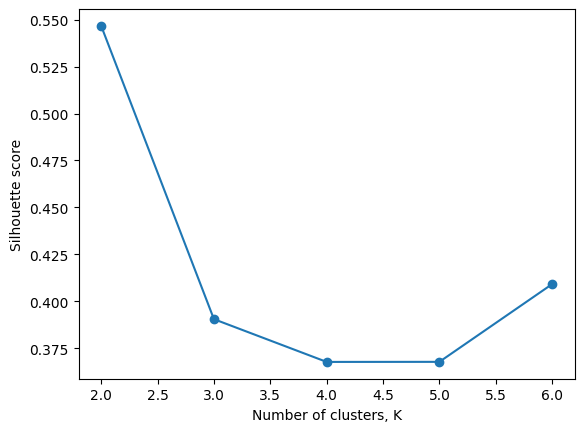

In [16]:
X = new_df

silhouette_scores = []
for i in range(2,7):
    kmeans = KMeans(n_clusters=i, n_init=10).fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)
    print('For value', i, 'the average silhouette score is:', silhouette_avg)
plt.plot(range(2, 7), silhouette_scores, '-o')
plt.xlabel('Number of clusters, K')
plt.ylabel('Silhouette score')
plt.show()

In [17]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(X)
new_df['cluster'] = kmeans.labels_
new_df

,W/L%,SRS,Rel ORtg,Rel DRtg,cluster
1,0.402,-3.96,0.0,4.0,1
2,0.329,-8.55,-4.2,4.9,1
3,0.583,1.81,5.5,3.7,0
4,0.473,-0.61,3.1,4.2,0
5,0.646,4.43,4.3,0.1,0
6,0.598,2.60,0.5,-2.2,0
7,0.500,-0.23,1.5,2.0,0
8,0.537,0.98,2.4,1.6,0
9,0.622,4.41,2.6,-1.9,0
10,0.659,4.44,4.8,0.7,0


As can be seen from the table above, we can see that portland trailblazer last season performance is included into cluster 1. 
Let's visualize the cluster

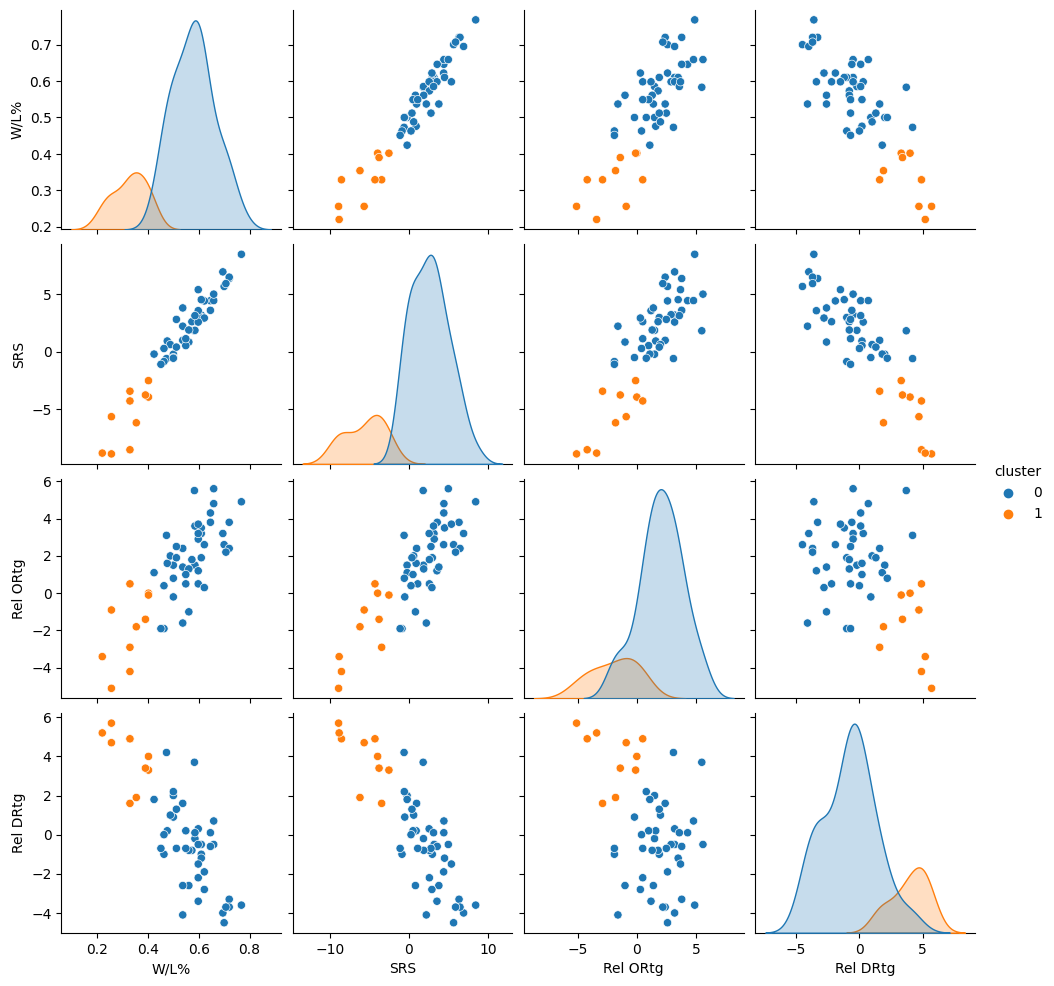

In [18]:
sns.pairplot(new_df, hue='cluster')

In [19]:
new_df['Season'] = df['Season']
new_df = new_df[['Season', 'W/L%', 'SRS', 'Rel ORtg', 'Rel DRtg', 'cluster']]
print(new_df)

     Season   W/L%   SRS  Rel ORtg  Rel DRtg  cluster
1   2022-23  0.402 -3.96       0.0       4.0        1
2   2021-22  0.329 -8.55      -4.2       4.9        1
3   2020-21  0.583  1.81       5.5       3.7        0
4   2019-20  0.473 -0.61       3.1       4.2        0
5   2018-19  0.646  4.43       4.3       0.1        0
6   2017-18  0.598  2.60       0.5      -2.2        0
7   2016-17  0.500 -0.23       1.5       2.0        0
8   2015-16  0.537  0.98       2.4       1.6        0
9   2014-15  0.622  4.41       2.6      -1.9        0
10  2013-14  0.659  4.44       4.8       0.7        0
11  2012-13  0.402 -2.53      -0.1       3.3        1
12  2011-12  0.424 -0.22       1.1       1.8        0
13  2010-11  0.585  1.85       1.5      -0.2        0
14  2009-10  0.610  3.18       3.2      -0.5        0
15  2008-09  0.659  5.00       5.6      -0.5        0
16  2007-08  0.500 -0.52      -0.2       0.9        0
17  2006-07  0.390 -3.78      -1.4       3.4        1
18  2005-06  0.256 -8.91    

As can be seen from the table above, we can see that portland trailblazer last season performance is included into cluster 1. In all the variable, cluster 1 are lower than cluster 0. Therefore, the 2022-2023 Portland trailblazer performance is clustered into the 'bad' cluster which means the performance is bad.

Don't worry my fellow Blazer fan, Scott Henderson is a good pick. Hopefully he is our new hero (cries in Dame trade request)

### Interpreting the Results

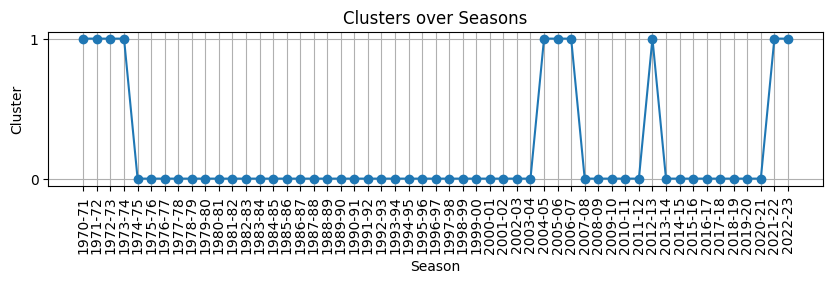

In [23]:


seasons = new_df["Season"]
clusters = new_df["cluster"]

plt.figure(figsize=(10, 2))
plt.plot(seasons[::-1], clusters[::-1], marker='o', linestyle='-')
plt.xlabel("Season")
plt.ylabel("Cluster")
plt.title("Clusters over Seasons")
plt.xticks(rotation=90)
plt.grid(True)
plt.yticks([0, 1])
plt.show()

In [24]:
new_df

,Season,W/L%,SRS,Rel ORtg,Rel DRtg,cluster
1,2022-23,0.402,-3.96,0.0,4.0,1
2,2021-22,0.329,-8.55,-4.2,4.9,1
3,2020-21,0.583,1.81,5.5,3.7,0
4,2019-20,0.473,-0.61,3.1,4.2,0
5,2018-19,0.646,4.43,4.3,0.1,0
6,2017-18,0.598,2.60,0.5,-2.2,0
7,2016-17,0.500,-0.23,1.5,2.0,0
8,2015-16,0.537,0.98,2.4,1.6,0
9,2014-15,0.622,4.41,2.6,-1.9,0
10,2013-14,0.659,4.44,4.8,0.7,0


Saving our result

In [22]:
new_df.to_csv('final.csv', index=False)